## **Autoencoder**

example codes of autoencdoer and the variants.

### 1. Autoencoder

modified code from https://github.com/L1aoXingyu/pytorch-beginner/blob/master/08-AutoEncoder/simple_autoencoder.py

In [ ]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as img

num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
	def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

In [ ]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

epoch [1/100], loss:0.1306


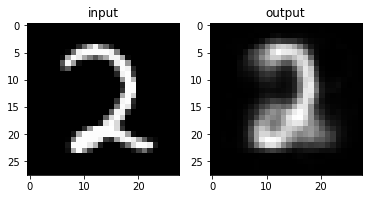

epoch [11/100], loss:0.1290


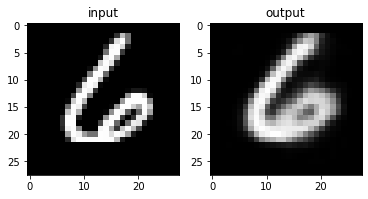

epoch [21/100], loss:0.1302


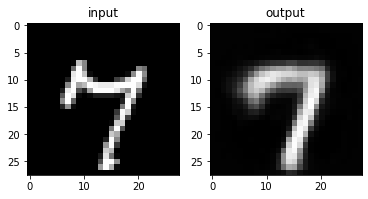

epoch [31/100], loss:0.1130


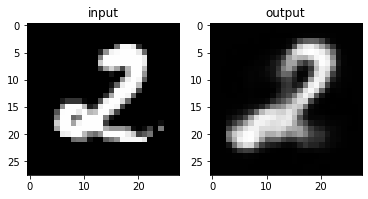

epoch [41/100], loss:0.1279


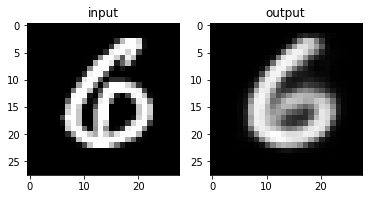

epoch [51/100], loss:0.1171


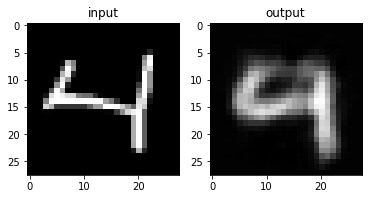

epoch [61/100], loss:0.1240


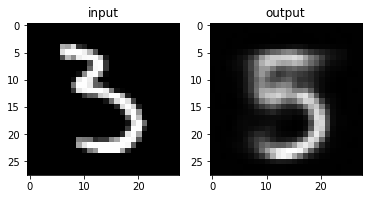

epoch [71/100], loss:0.1217


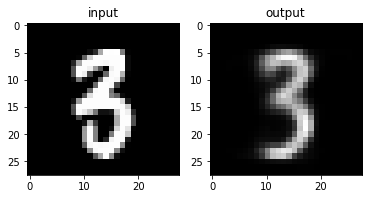

epoch [81/100], loss:0.1124


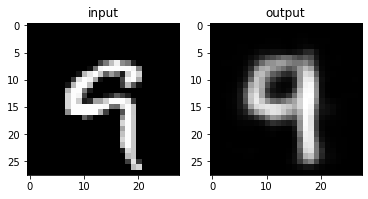

epoch [91/100], loss:0.1182


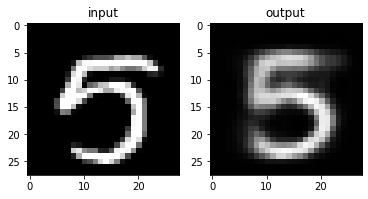

In [ ]:
for epoch in range(num_epochs):
    for data in dataloader:
        img_, _ = data
        img = img_.view(img_.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    if epoch % 10 == 0:
      print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))
      fig, ax = plt.subplots(nrows=1, ncols=2)
      plt.subplot(1, 2, 1)               
      plt.imshow(img_[0][0],cmap='gray')
      plt.title('input')

      pic = to_img(output.cpu().data)
      plt.subplot(1, 2, 2)           
      plt.imshow(pic[0][0],cmap='gray')
      plt.title('output')

      plt.show()

### 2. Denoising AutoEncoder

referenced https://github.com/wikibook/keras/blob/master/chapter3-autoencoders/denoising-autoencoder-mnist-3.3.1.py
and
https://discuss.pytorch.org/t/how-to-add-noise-to-mnist-dataset-when-using-pytorch/59745

In [ ]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [ ]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    AddGaussianNoise(0, 1)
])
noisy_dataset = MNIST('./data', transform=img_transform, download=True)
noisy_dataloader = DataLoader(noisy_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

epoch [1/100], loss:1.1890


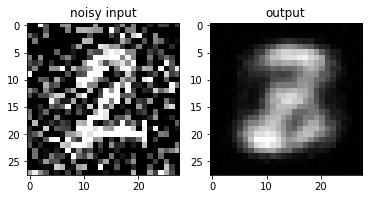

epoch [11/100], loss:1.1445


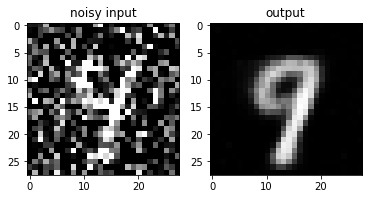

epoch [21/100], loss:1.1381


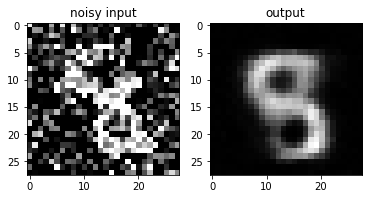

epoch [31/100], loss:1.1169


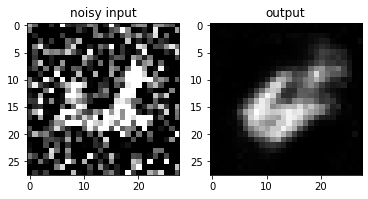

epoch [41/100], loss:1.1342


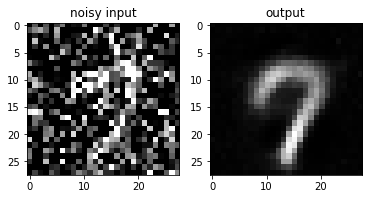

epoch [51/100], loss:1.1230


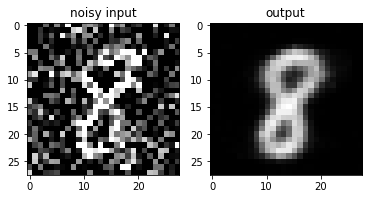

epoch [61/100], loss:1.1206


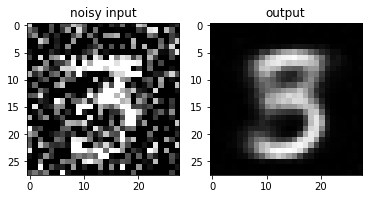

epoch [71/100], loss:1.1331


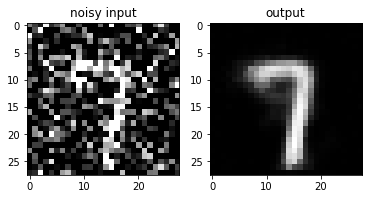

epoch [81/100], loss:1.1313


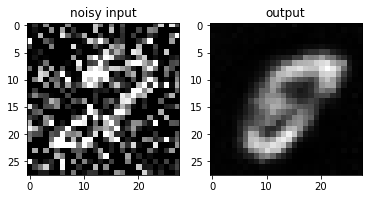

epoch [91/100], loss:1.1278


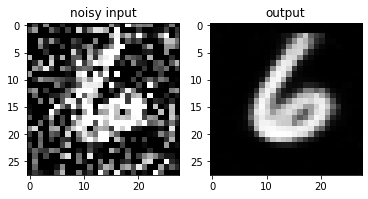

In [ ]:
for epoch in range(num_epochs):
    for data in noisy_dataloader:
        img_, _ = data
        img = img_.view(img_.size(0), -1)
        img = Variable(img).cuda()
        
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    if epoch % 10 == 0:
      print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))
      plt.subplot(1, 2, 1)     
      pic = to_img(img.cpu().data)
      plt.imshow(pic[0][0],cmap='gray')
      plt.title('noisy input')

      pic = to_img(output.cpu().data)
      plt.subplot(1, 2, 2)           
      plt.imshow(pic[0][0],cmap='gray')
      plt.title('output')

      plt.show()